In [87]:
from dataset import CustomDataset
import pandas as pd

In [88]:
df = pd.read_csv("./CSV/train_central.csv")
trainData=CustomDataset(df, False)

In [89]:
sample = trainData[98]
img = sample["label"]

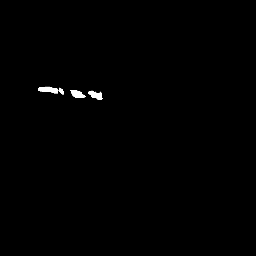

In [90]:
from torchvision import transforms
img = transforms.ToPILImage()(img.squeeze())
img

In [91]:
from networks import Baseline_Unet
import torch
from torchvision import transforms
net= Baseline_Unet()
net.load_state_dict(torch.load("./models/Baseline_Unet/Unet.pkl"))
out=net(torch.stack([sample["image"]], dim=0).type(torch.float32))
out=torch.where(out>0.2, 1.0, 0.0)
pilResult=transforms.ToPILImage()(out.squeeze())
print(out.size())

torch.Size([1, 1, 256, 256])


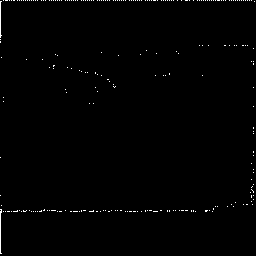

In [92]:
pilResult